# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [203]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    
#     plt.figure()
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [3]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

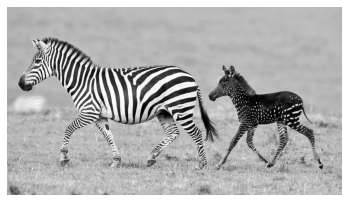

In [4]:
myimshow(zebra)

In [5]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

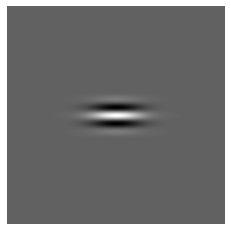

In [102]:
filtro = genGabor((256,256), 0.3, np.pi/2)

myimshow(filtro)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

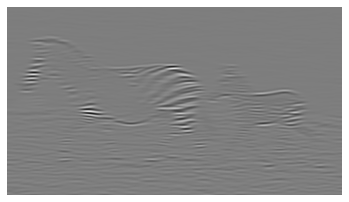

In [103]:
import cv2

img = cv2.filter2D(zebra, -1, filtro)

myimshow(img)

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

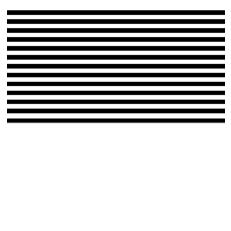

In [142]:
img =  imageio.imread('gabor1.jpg')
filtro = genGabor((64,64), 0.3, np.pi/2)

img = cv2.filter2D(img, -1, filtro)


myimshow(img)
# filtro = genGabor((5,5), 1,np.pi / 180)

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

#### Risposta

Il filtro più semplice è sobel orizzontale che va a calcolare la differenza di intensità tra i pixel superiori con quelli inferiori o vicevarsa in base all'orientamento del filtro. 


Quindi avremo che:

[1  2  1]
 [0  0 0]
[-1 -2 -1]
1. se i valori sono uguali, e quindi non c'è una variazione di intensità, avremo come risultato zero(colore nero)
2. mentre se c'è una variazione, in base a come è orientato il filtro, potrebbe tornare un valore minore di zero o maggiore di zero

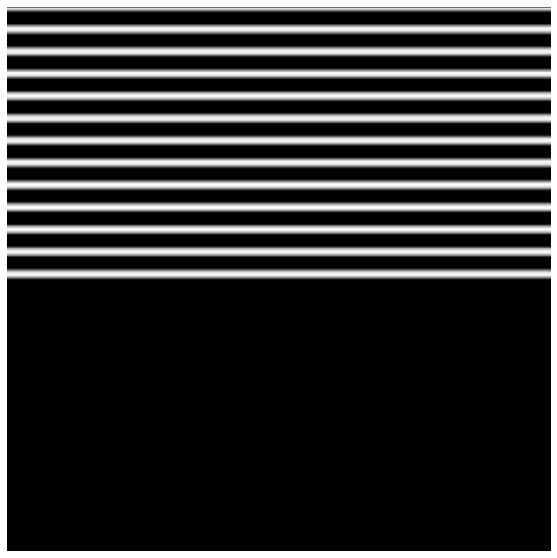

In [219]:
from skimage import filters
img =  imageio.imread('gabor1.jpg')

f_image = np.clip(filters.sobel_h(img),0,255)

plt.figure(figsize=(10,10))
myimshow(f_image)

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

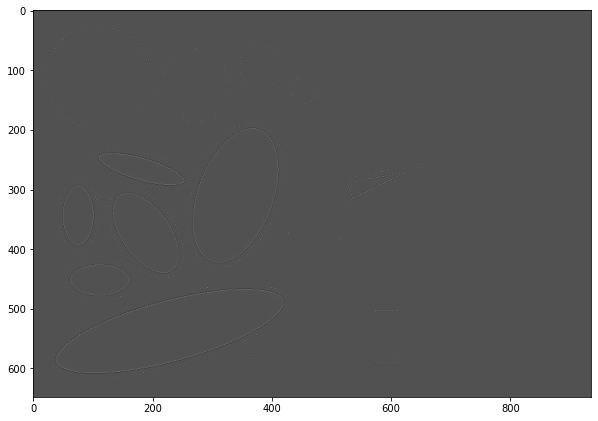

In [220]:
from scipy import ndimage

img =  rgb2gray(imageio.imread('ovali.jpg'))


l_image = ndimage.filters.laplace(img)

plt.figure(figsize=(10,10))
plt.imshow(l_image)
plt.show()

# Esercizio 3

Spiegare e mostrare con un esempio numerico i vantaggi e gli svantaggi di applicare un filtro 5x5 oppure due filtri 5x1 e 1x5 in sequenza. 

### Risposta
L'applcazione di un filtro 5x5 comporta più operazioni e quindi richiede più tempo di computazione. Mentre se si applicano in sequeza il filtro 5x1 e 1x5 il numero di operazioni eseguite è molto minore. L'output dei due tipi di operazioni è uguale se il filtro di partenza è separabile.

Avendo un immagine MxN e applicando un filtro JxK, 
-con una normale convoluzione avremo circa J*K*M*N operazioni
-con un filtro separabile, e quindi applicanzo in modo sequenziale i due filtri avremo circa M*N*(J+K) operazioni.

Esempio:
-immagine 3x3
-filtro 5x5

Convoluzione: 5*5*3*3 = 255
con filtro separabile: 3*3*(5+5) = 90

Di seguito un esempio di filtro 5x5 separabile:

In [ ]:
fitro5_5 = np.array([ 
    [1,1,-2,1,1],
    [1,1,-2,1,1],
    [-2,-2,4,-2,-2],
    [1,1,-2,1,1],
    [1,1,-2,1,1],
])

fitro5_1 = np.array([ 
    [1],
    [1],
    [-2],
    [1],
    [1]
])
fitro1_5 = np.array([ 
    [1,1,-2,1,1],
])


# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough contornandoli con un quadrato

![](forme.jpg)

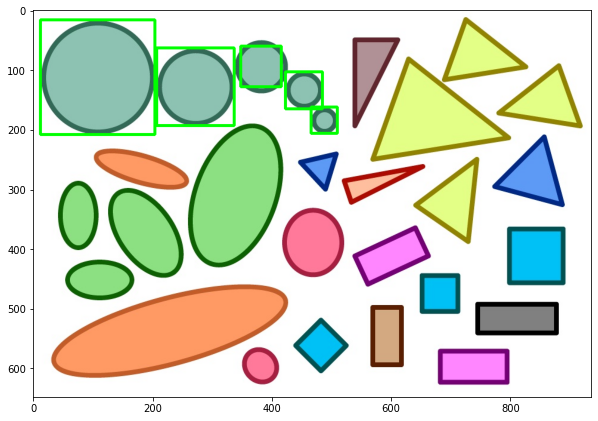

In [222]:
import skimage

img =  plt.imread('forme.jpg')
img_gray = rgb2gray(img)
img_blur = cv2.GaussianBlur(img_gray, (31, 31), 5)

img_blur = (img_blur*255).astype(np.uint8)

circles_float = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 0.9, 
                                 minDist=40, 
                                 param1=50, param2=85, 
                                 minRadius=5, maxRadius=105)
circles = np.uint16(np.around(circles_float))

circles = np.squeeze(circles)

for i in range(circles.shape[0]):
    c = (circles[i, 0], circles[i, 1])
    r = circles[i, 2]
    p1 = (c[0]-r,c[1]-r)
    p2 = (c[0]+r,c[1]+r)
    cv2.rectangle(img, p1, p2, (0,255,0), 3)
    
    

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


# Esercizio 5

Scrivere un filtro 3x3 che restituisce un valore positivo se la media dei vicini è inferiore al valore del centro, e negativo altrimenti. Cosa calcola tale filtro? Illustrarlo su un'immagine 

In [234]:
iso_laplace = np.array([ 
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])
